In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression

In [114]:
import numpy as np
N=100
def sim_data(N):
    np.random.seed(42)
    
    # Parameters
    beta_intercept = np.random.uniform(0, 2)
    true_beta = np.random.uniform(0, 1.5, 4) # Shape (5,)
    
    # 1. Generate core features (N rows, 4 columns)
    x_non_outlier = np.random.uniform(-5, 5, (N,4))
    
    # Generate Y
    noise = np.random.normal(0, 5, N)
    y = beta_intercept + np.dot(x_non_outlier, true_beta) + noise
    
    return x_non_outlier, y

x, y = sim_data(N)

# replace x4 with a vector that contains outliers
p_outlier = 0.05
is_outlier = np.random.binomial(1, p_outlier, N)
x_outlier_raw = (1 - is_outlier) * np.random.randn(N) + is_outlier * (100 * np.random.randn(N))
x[:, 3] = x_outlier_raw

In [113]:
import numpy as np

def sim_data(N):
    np.random.seed(42)
    
    # Parameters
    beta_intercept = np.random.uniform(0, 2)
    true_beta = np.random.uniform(0, 1.5, 5) # Shape (5,)
    
    # 1. Generate core features (N rows, 4 columns)
    x_non_outlier = np.random.uniform(-5, 5, (N, 4))
    
    # 2. Generate outlier feature
    # Problem source: This resulted in shape (N,), a flat 1D array
    p_outlier = 0.05
    is_outlier = np.random.binomial(1, p_outlier, N)
    x_outlier_raw = (1 - is_outlier) * np.random.randn(N) + is_outlier * (100 * np.random.randn(N))
    
    # CORRECTION 1: Reshape to (N, 1) so it becomes a 2D column vector
    x_outlier = x_outlier_raw.reshape(-1, 1) 
    
    # CORRECTION 2: Use axis=1 to stack columns (features), not rows (observations)
    x_complete = np.concatenate((x_non_outlier, x_outlier), axis=1)
    
    # Generate Y
    noise = np.random.normal(0, 5, N)
    y = beta_intercept + np.dot(x_complete, true_beta) + noise
    
    return x_complete, y

x, y = sim_data(100)
print(f"Shape of X: {x.shape}") # Should be (100, 5)

Shape of X: (100, 5)


(array([24., 70.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.74095484, -0.62802584,  1.48490316,  3.59783217,  5.71076117,
         7.82369017,  9.93661918, 12.04954818, 14.16247718, 16.27540619,
        18.38833519]),
 <BarContainer object of 10 artists>)

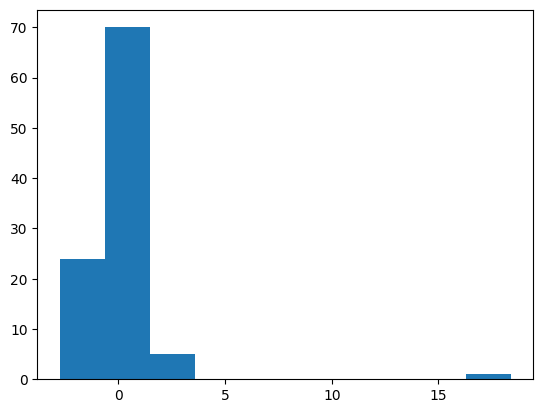

In [116]:
plt.hist(x[:, 3])

In [118]:
# fit a linear model
lm_model = LinearRegression()
lm_model.fit(x, y)

preds_lm = lm_model.predict(x)
residuals_lm = y - preds_lm

In [119]:
# fit a tree

tree_model = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_model.fit(x, y)

preds_tree = tree_model.predict(x)
residuals_tree = y - preds_tree

[Text(0.5, 0.9, 'x[0] <= 1.35\nsamples = 100.0%\nvalue = 1.4'),
 Text(0.25, 0.7, 'x[1] <= 1.62\nsamples = 64.0%\nvalue = -2.01'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[2] <= -2.29\nsamples = 43.0%\nvalue = -4.47'),
 Text(0.0625, 0.3, 'x[0] <= 1.2\nsamples = 17.0%\nvalue = -8.67'),
 Text(0.03125, 0.1, 'samples = 16.0%\nvalue = -9.4'),
 Text(0.09375, 0.1, 'samples = 1.0%\nvalue = 3.08'),
 Text(0.1875, 0.3, 'x[1] <= -4.18\nsamples = 26.0%\nvalue = -1.73'),
 Text(0.15625, 0.1, 'samples = 4.0%\nvalue = -7.59'),
 Text(0.21875, 0.1, 'samples = 22.0%\nvalue = -0.66'),
 Text(0.375, 0.5, 'x[2] <= 0.57\nsamples = 21.0%\nvalue = 3.02'),
 Text(0.3125, 0.3, 'x[0] <= -1.38\nsamples = 13.0%\nvalue = 0.98'),
 Text(0.28125, 0.1, 'samples = 8.0%\nvalue = -1.44'),
 Text(0.34375, 0.1, 'samples = 5.0%\nvalue = 4.86'),
 Text(0.4375, 0.3, 'x[0] <= -0.72\nsamples = 8.0%\nvalue = 6.34'),
 Text(0.40625, 0.1, 'samples = 6.0%\nvalue = 4.86'),
 Text(0.46875, 0.1, 'samples = 2.0%\nvalue = 10.75'),
 Text(

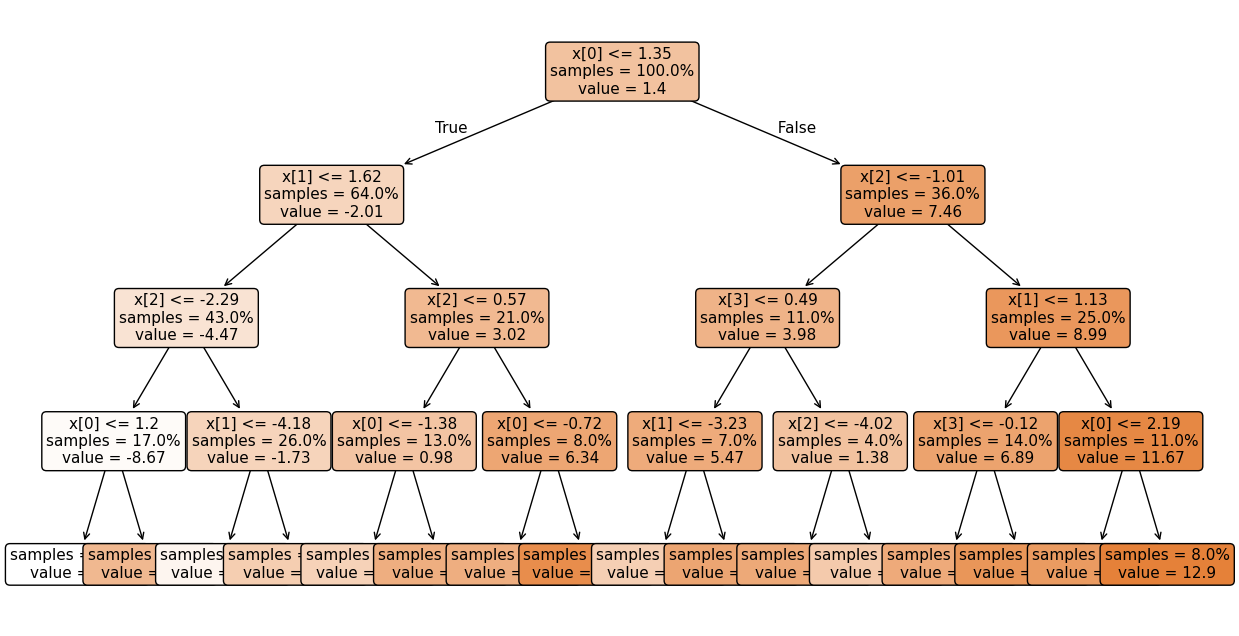

In [120]:
plt.figure(figsize=(15, 8))
plot_tree(
    tree_model, 
    filled=True, 
    rounded=True, 
    impurity=False,
    fontsize=11,
    precision=2,
    proportion=True
)

Text(0, 0.5, 'Residuos')

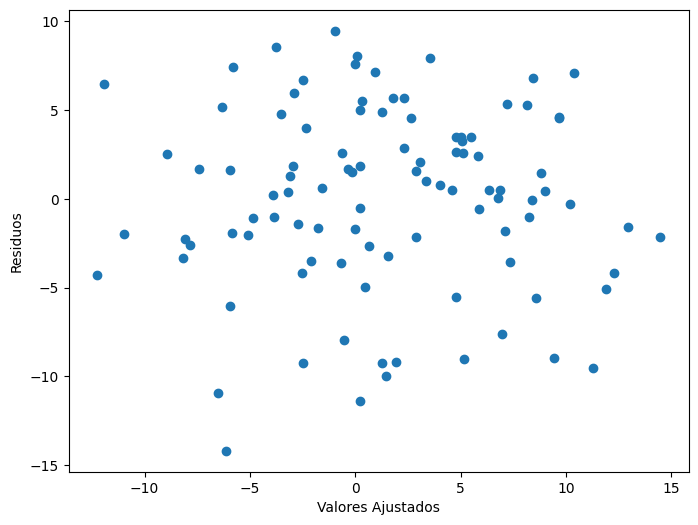

In [125]:
# plot fitted vs. residuals

fig, ax = plt.subplots(1, figsize=(8, 6))
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Valores Ajustados')
ax.set_ylabel('Residuos')



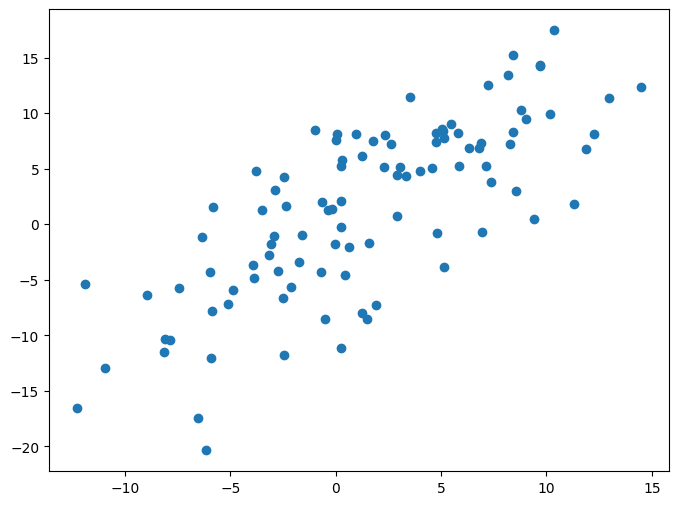

In [126]:
# plot fitted vs. residuals

fig, ax = plt.subplots(1, figsize=(8, 6))

ax.scatter(preds_lm, y)

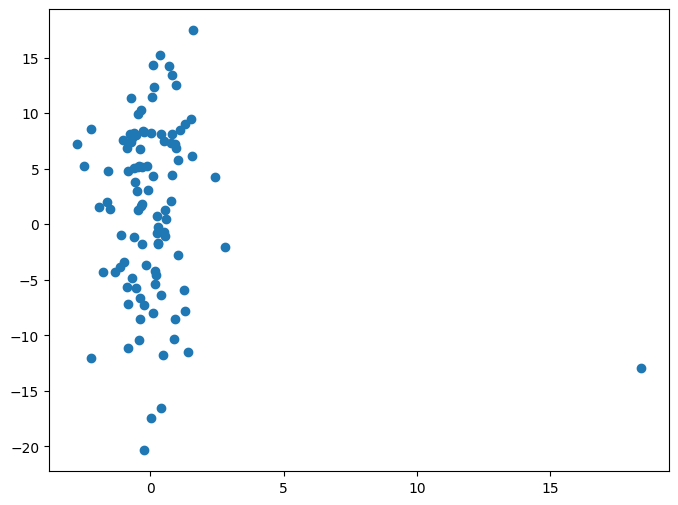

In [127]:
# plot fitted vs. residuals

fig, ax = plt.subplots(1, figsize=(8, 6))

ax.scatter(x[:, 3], y)

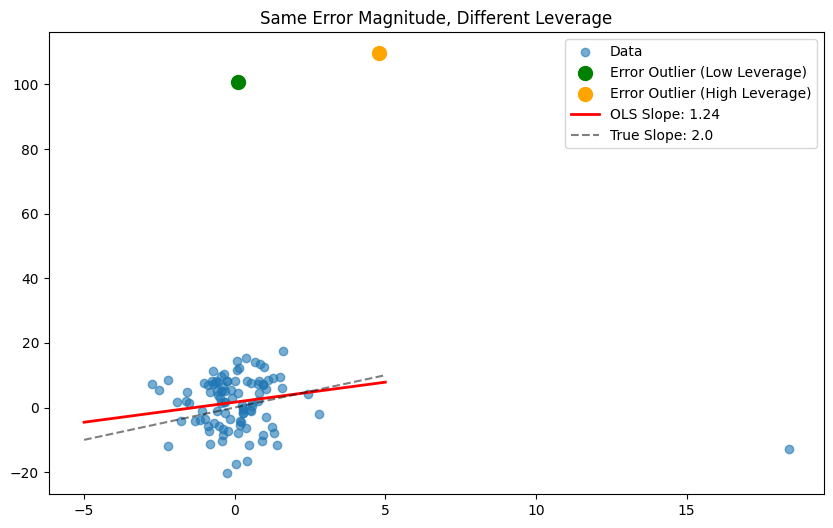

In [134]:
# Fit OLS
X_const = sm.add_constant(x)
model = sm.OLS(y, X_const)
results = model.fit()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x[:, 3], y, alpha=0.6, label='Data')

# Highlight the two specific outliers
ax.scatter([0.1], [0.1*2 + 100 + 0.5], color='green', s=100, label='Error Outlier (Low Leverage)')
ax.scatter([4.8], [4.8*2 + 100], color='orange', s=100, label='Error Outlier (High Leverage)')

# Plot Regression
x_grid = np.linspace(-5, 5, 100)
y_pred = results.params[0] + results.params[1] * x_grid
ax.plot(x_grid, y_pred, color='red', linewidth=2, label=f'OLS Slope: {results.params[1]:.2f}')

# True Slope reference
ax.plot(x_grid, 2*x_grid, color='black', linestyle='--', alpha=0.5, label='True Slope: 2.0')

ax.set_title("Same Error Magnitude, Different Leverage")
ax.legend()
plt.show()